#2η ομαδική εργασία στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο

Μέλη: 

      Αργυρού Γεωργία 03119046

      Μαγγελάκη Βαρβάρα-Κωνσταντίνα 03119180

## Θεωρητικό Μέρος

Ερώτημα β1.

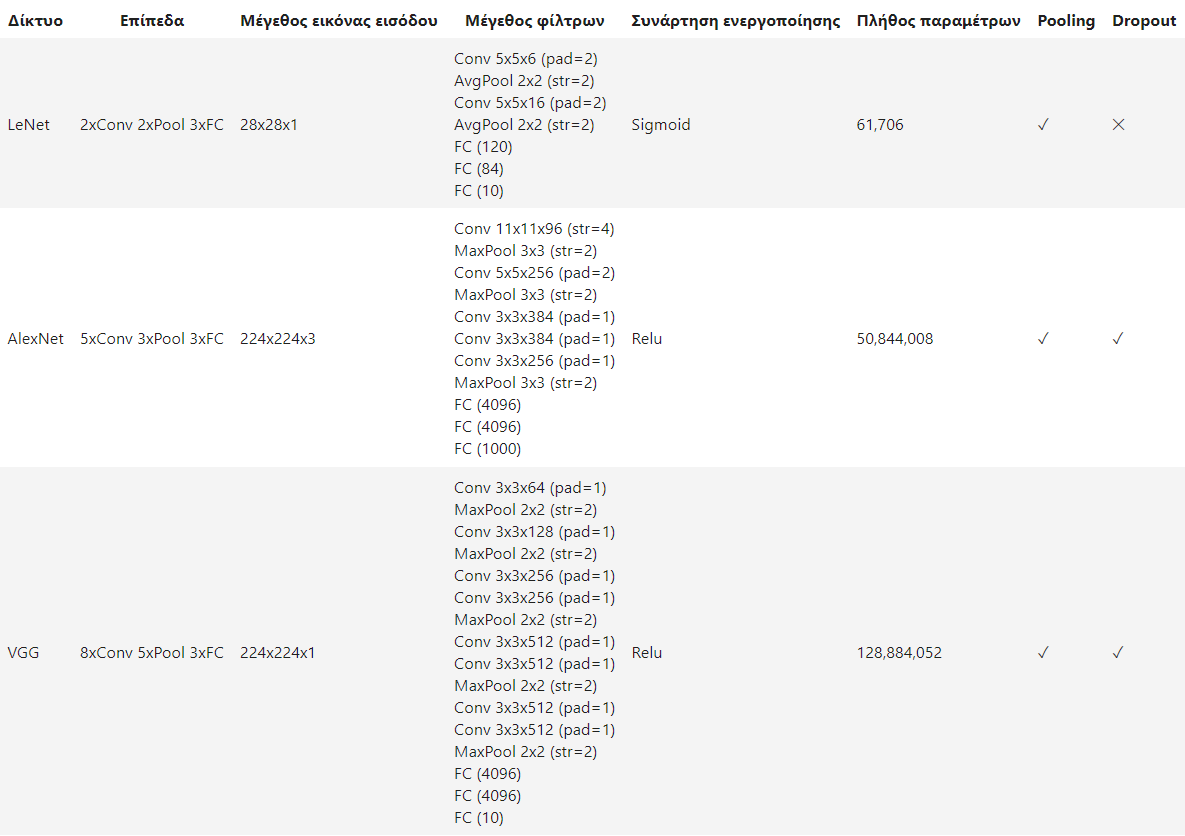

Ερώτημα β2.



Το μοντέλο για την "Handwritten digit recognition" είναι απόδειξη ότι μπορεί να υπάρξουν large-propagation networks χωρίς μεγάλο, περίπλοκο στάδιο προεπεξεργασίας. Το learning network δέχεται ως είσοδο απευθείας εικόνες και όχι βέκτορες, ανταποκρινόμενο σε μεγάλο πλήθος low-level πληροφορίας. Η αναγνώριση ψηφίων είναι σχετικά απλή καθώς η είσοδος αποτελείται από ασπρόμαυρα pixels, καλά διαχωρισμένα από το background, με κανονικοποιημένο μέγεθος(ώστε να χωράνε σε μια 16x16 εικόνα) και υπάρχουν μόνο 10 κατηγορίες εξόδου (10 units) . Πρόκειται για ένα multi-layer network με εκπαίδευση μέσω back-propagation. Όλες οι συνδέσεις στο δίκτυο είναι adaptive, αλλά πολύ περιοριστικές.Ένα fully-connected δίκτυο δεν θα ήταν ικανό να γενικεύσει σωστά, άρα χρησιμοποιείται ένα restricted connection-scheme. Οι συνδέσεις στα πρώτα στρώματα είναι τοπικές και αφού εάν ένας feature detector είναι χρήσιμος σε ένα σημείο της εικόνας, πιθανόν να είναι και σε άλλα, χρησιμοποιείται ένα επιπλέον στρώμα (feature map) με την τεχνική του weight sharing. Τέλος, όσον αφορά την αρχιτεκτονική του δικτύου κάθε feature extraction ακολουθείται από ένα επιπλέον στρώμα που πραγματοποιεί local averaging και subsampling. Συνολικά υπάρχουν 4 hidden layers, εναλλάξ shared-weights feature extractors και averaging/sampling. Η απόδοση του δικτύου κυμαίνεται σε error 1.1%  (MSE .017) σε training set και σε 3.4% σε όλο το test set (MSE .024) .

Το μοντέλο "ImageNet Classification"  αποτελείται από 8 learned layers, 5 convolutional και 3 fully-connected. Επίσης, χρησιμοποιείται ReLU (f(x) = max(0,x)) επιταχύνοντας την εκπαίδευση.  Επίσης γίνεται χρήση 2 GPUs και kernel maps με overlapping pooling. Πιο συγκεκριμένα, οι έξοδοι γειτονικών ομάδων γίνονται summarized στο ίδιο kernel map. Υπάρχουν 1000 κλάσεις και 60 εκ. παράμετροι. Όσον αφορά την απόδοση του δικτύου, επιτυγχάνεται top-1 και top-5 test set error rates στο 37.5% και 17%.

Τέλος, η αρχιτεκτονική του very deep cnn για "Large-scale image recognition" παρουσιάζει αρκετές διαφορές και με τα δύο προηγούμενα μοντέλα. Η είσοδος είναι 224x224 RGB εικόνα. Η προεπεξεργασία αφορά την αφαίρεση της μέσης RGB τιμής από κάθε pixel. Και αυτό το μοντέλο χρησιμοποιεί χωρικό pooling, που πραγματοποιείται από 5 layers, με 2x2 pixel windows. Μια σειρά από convolutional layers ακολουθείται από 3 Fully - Connected layers. Το τελικό layer είναι το soft-max. Όλα τα hidden layers διαθέτουν ReLU. Η απόδοση του μοντέλου επιδεικνύεται από top-1 error 23.7% και top-5 error 6.8%.

## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)


In [ ]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 4s 0us/step


In [ ]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας. 

In [ ]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 11

In [ ]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [ ]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [ ]:
# print our classes
print(our_classes)

['apple', ' aquarium_fish', ' bicycle', ' boy', ' couch', ' flatfish', ' kangaroo', ' leopard', ' lion', ' mouse', ' mushroom', ' orchid', ' plain', ' plate', ' skunk', ' streetcar', ' sunflower', ' table', ' telephone', ' tulip']


In [ ]:
print(x_train_ds[1].shape)

(32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


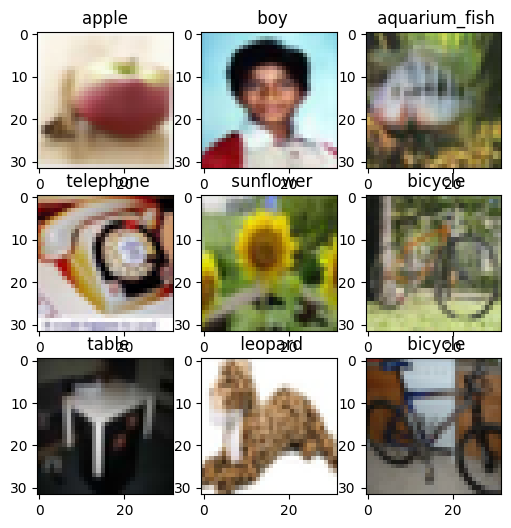

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

## Ερώτημα 1
---
#### Βήμα 1: Σχεδίαση, μεταγλώττιση και εκπαίδευση των μοντέλων

 1. Σχεδίαστε, μεταγλωττίστε και εκπαιδεύστε τα μοντέλα  **LeNet, AlexNet και  VGG**, καθώς και ένα δικό σας μοντέλο (ονομάστε το π.χ. **MyCNN**) χρησιμοποιώντας διαφορετικούς συνδυασμούς (τουλάχιστον 2 ανά μοντέλο) για [optimizer](https://keras.io/api/optimizers/), [loss](https://keras.io/api/losses/), batch size και epoch.  Για [metrics](https://keras.io/api/metrics/) να χρησιμοποιήσετε την ορθότητα - accuracy (όπως στο Lab5).
---
  
#### Βήμα 2: Αξιολόγηση των μοντέλων

1. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε, απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών, για κάθε διαφορετικό συνδυασμό του βήματος 1 και επιλέξτε αυτό με την καλύτερη ορθότητα από κάθε μοντέλο (ένα από κάθε αρχιτεκτονική, συνολικά 4).
2. Για κάθε ένα από τα μοντέλα με την καλύτερη ορθότητα (συνολικά **4**), απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών.
3. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:
 - Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)
 
---

#### Βήμα 3: Αξιολόγηση ορθότητας
Αξιολογήστε την ορθότητα για το test set σας.



## Ερώτημα 2
---
### Βήμα 1: Έλεγχος υπερεκπαίδευσης

Για τον καλύτερο συνδυασμό που λάβατε από το Ερώτημα 1 για μοντέλο σας  (**MyCNN**) και μόνο, δοκιμάστε διάφορους συνδυασμούς των ακόλουθων τεχνικών για τον έλεγχο της υπερεκπαίδευσης (overfitting), όπως: 

- Dropout ([Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout))

- Επαύξηση δεδομένων ([Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)) 

\\
, ώστε το μοντέλο σας να γενικεύει καλύτερα.

---
### Βήμα 2: Αξιολόγηση
Αξιολογήστε της ορθότητας για το validation και το test set σας.

## Ερώτημα 3
---
### Βήμα 1: Μεταφορά γνώσης
Εφαρμόστε μεταφορά γνώσης (transfer learning) στο δικό σας μοντέλο (**MyCNN**), που αξιολογήσατε ως καλύτερο προς την ορθότητα στην αντιμετώπιση της υπερεκπαίδεσης. 

Για το transfer learning, επιλέξτε το [VGG19](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19)  και το [EfficientNetB0](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB0) για μεταφορά μάθησης.

1. "Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).  

2. Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

3. Αξιολογήστε τα αποτελέσματά σας, βάσει της ορθότητας του validation set και του test set σας.

## Ερώτημα 1

Βήμα 1: Σχεδίαση των μοντέλων

### LeNet


In [ ]:
# Ανάγουμε τις τιμές των labels στο διάστημα 0-19 αντί του 0-99 για να έχουμε μικρότερο αριθμό εξόδων του τελευταίου dense layer.
import numpy as np

values = np.unique(y_val)
values = np.sort(values)

y_val_to20 = np.zeros(len(y_val), dtype=int)
for i in range (y_val.shape[0]):
  y_val_to20[i] =  np.where(values == y_val[i])[0][0]

y_train_to20 = np.zeros(len(y_train), dtype=int)
for i in range (y_train.shape[0]):
  y_train_to20[i] =  np.where(values == y_train[i])[0][0]

y_test_to20 = np.zeros(len(y_test), dtype=int)
for i in range (y_test.shape[0]):
  y_test_to20[i] =  np.where(values == y_test[i])[0][0]

In [ ]:
import tensorflow as tf     #Σχεδιάζουμε τα μοντέλα
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# LeNet: Custom LeNet model for 32x32x3 images and 20 categories
def LeNet():
  model = models.Sequential()
  model.add(layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid', padding='same', input_shape=(32, 32, 3)))  
  model.add(layers.AvgPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=16, kernel_size=5, activation='sigmoid')) 
  model.add(layers.AvgPool2D(pool_size=2, strides=2))
  model.add(layers.Flatten())
  model.add(layers.Dense(120, activation='sigmoid'))
  model.add(layers.Dense(84, activation='sigmoid'))
  model.add(layers.Dense(20))
  return model

In [ ]:
X = tf.random.uniform((1, 32, 32, 3))
for layer in LeNet().layers:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)
LeNet_model_1 = LeNet()
LeNet_model_2 = LeNet()
LeNet_model_1.summary()

Conv2D output shape: 	 (1, 32, 32, 6)
AveragePooling2D output shape: 	 (1, 16, 16, 6)
Conv2D output shape: 	 (1, 12, 12, 16)
AveragePooling2D output shape: 	 (1, 6, 6, 16)
Flatten output shape: 	 (1, 576)
Dense output shape: 	 (1, 120)
Dense output shape: 	 (1, 84)
Dense output shape: 	 (1, 20)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d_2 (Averag  (None, 16, 16, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)          

### AlexNet

In [ ]:
# Some customizations were made so that images with 32x32x3 dimensions are used as input. For this
# reason a smaller kernel was used for the first convolutional layer so that its output dimensions are not 
# dramatically decreased
def AlexNet():
  model = models.Sequential()
  model.add(layers.Conv2D(filters=96, kernel_size=3, strides=2, activation='relu', input_shape=(32, 32, 3)))  
  model.add(layers.MaxPool2D(pool_size=3, strides=2))
  model.add(layers.Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=3, strides=2))
  model.add(layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=3, strides=2))
  model.add(layers.Flatten())
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(20))
  return model

In [ ]:
X = tf.random.uniform((1, 32, 32, 3))  
for layer in AlexNet().layers:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)
AlexNet_model_1 = AlexNet()
AlexNet_model_2 = AlexNet()
AlexNet_model_1.summary()

Conv2D output shape: 	 (1, 15, 15, 96)
MaxPooling2D output shape: 	 (1, 7, 7, 96)
Conv2D output shape: 	 (1, 7, 7, 256)
MaxPooling2D output shape: 	 (1, 3, 3, 256)
Conv2D output shape: 	 (1, 3, 3, 384)
Conv2D output shape: 	 (1, 3, 3, 384)
Conv2D output shape: 	 (1, 3, 3, 256)
MaxPooling2D output shape: 	 (1, 1, 1, 256)
Flatten output shape: 	 (1, 256)
Dense output shape: 	 (1, 4096)
Dropout output shape: 	 (1, 4096)
Dense output shape: 	 (1, 4096)
Dropout output shape: 	 (1, 4096)
Dense output shape: 	 (1, 20)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 15, 15, 96)        2688      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 96)         0         
 2D)                                                             
                                                                 

### VGG

In [ ]:
# Some customizations were made so that images with 32x32x3 dimensions are used as input. For this
# reason a smaller number of vggs blocks(less layers) were used so that its output dimensions are not 
# dramatically decreased.
def VGG_block(num_convs, num_channels):
  block = models.Sequential()
  for _ in range(num_convs):
    block.add(layers.Conv2D(num_channels, kernel_size=3, padding='same', activation='relu'))
  block.add(layers.MaxPool2D(pool_size=2, strides=2))
  return block

In [ ]:
# Custom VGG model for 32x32x3 images and 20 categories
def VGG(conv_arch):
  model = models.Sequential()
  model.add(layers.Conv2D(conv_arch[0][1], kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
  # The convulational part
  for (num_convs, num_channels) in conv_arch:
      model.add(VGG_block(num_convs, num_channels))
  # The fully-connected part
  model.add(layers.Flatten())
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(20))
  return model

In [ ]:
conv_arch = ((1, 64), (1, 128), (2, 256))
X = tf.random.uniform((1, 32, 32, 3))  
for layer in VGG(conv_arch).layers:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)
VGG_model_1 = VGG(conv_arch)
VGG_model_2 = VGG(conv_arch)
VGG_model_1.summary()

Conv2D output shape: 	 (1, 32, 32, 64)
Sequential output shape: 	 (1, 16, 16, 64)
Sequential output shape: 	 (1, 8, 8, 128)
Sequential output shape: 	 (1, 4, 4, 256)
Flatten output shape: 	 (1, 4096)
Dense output shape: 	 (1, 4096)
Dropout output shape: 	 (1, 4096)
Dense output shape: 	 (1, 4096)
Dropout output shape: 	 (1, 4096)
Dense output shape: 	 (1, 20)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 sequential_11 (Sequential)  (None, 16, 16, 64)        36928     
                                                                 
 sequential_12 (Sequential)  (None, 8, 8, 128)         73856     
                                                                 
 sequential_13 (Sequential)  (None, 4, 4, 256)         885248    
                     

### MyCNN

In [ ]:
# Αρχικά για να υλοποιήσουμε το MyCNN χρησιμοποιήσαμε περισσότερα convolution και fc layers. Όμως παρατηρήσαμε πως για 
# τα συγκεκριμένα δεδομένα μπορούσε να επιτευχθεί καλύτερη επίδοση με λιγότερα convolution και fc layers. Έτσι το τελικό 
# αποτέλεσμα έχει λιγότερο χρόνο εκπαίδευσης. Πιθανότατα αυτό οφείλεται στο γεγονός ότι τα παραπάνω δίκτυα είναι σχεδιασμένα
# για μεγαλύτερες εικόνες από αυτές που εν προκειμένω χρησιμοποιήθηκαν.
def MyCNN():
  model = models.Sequential()
  model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))  
  model.add(layers.MaxPool2D(pool_size=2, strides=2)) 
  model.add(layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')) 
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Flatten())
  model.add(layers.Dense(2048, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(20))
  return model

In [ ]:
X = tf.random.uniform((1, 32, 32, 3)) 
for layer in MyCNN().layers:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)
MyCNN_model_1 = MyCNN()
MyCNN_model_2 = MyCNN()
MyCNN_model_1.summary()

Conv2D output shape: 	 (1, 32, 32, 128)
MaxPooling2D output shape: 	 (1, 16, 16, 128)
Conv2D output shape: 	 (1, 16, 16, 256)
MaxPooling2D output shape: 	 (1, 8, 8, 256)
Conv2D output shape: 	 (1, 8, 8, 512)
MaxPooling2D output shape: 	 (1, 4, 4, 512)
Flatten output shape: 	 (1, 8192)
Dense output shape: 	 (1, 2048)
Dropout output shape: 	 (1, 2048)
Dense output shape: 	 (1, 20)
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 

Βήμα 1: Μεταγλώττιση και εκπαίδευση μοντέλου

### LeNet

Πρώτη υλοποίηση 

In [ ]:
# Πρώτη υλοποίηση LeNet με optimizer="RMSprop", epochs=50, batch_size=10
LeNet_model_1.compile(optimizer="RMSprop",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

LeNet_history_1 = LeNet_model_1.fit(x_train, y_train_to20, epochs=50, batch_size=10,
                    validation_data=(x_val, y_val_to20))

Epoch 1/50
850/850 [==============================] - 14s 15ms/step - loss: 2.9881 - accuracy: 0.0639 - val_loss: 2.8289 - val_accuracy: 0.1353
Epoch 2/50
850/850 [==============================] - 13s 15ms/step - loss: 2.6995 - accuracy: 0.1619 - val_loss: 2.6412 - val_accuracy: 0.1660
Epoch 3/50
850/850 [==============================] - 13s 15ms/step - loss: 2.5705 - accuracy: 0.1999 - val_loss: 2.5210 - val_accuracy: 0.2180
Epoch 4/50
850/850 [==============================] - 13s 16ms/step - loss: 2.5074 - accuracy: 0.2266 - val_loss: 2.5104 - val_accuracy: 0.2253
Epoch 5/50
850/850 [==============================] - 13s 15ms/step - loss: 2.4624 - accuracy: 0.2348 - val_loss: 2.5175 - val_accuracy: 0.2080
Epoch 6/50
850/850 [==============================] - 13s 16ms/step - loss: 2.4234 - accuracy: 0.2481 - val_loss: 2.4258 - val_accuracy: 0.2533
Epoch 7/50
850/850 [==============================] - 13s 16ms/step - loss: 2.3838 - accuracy: 0.2639 - val_loss: 2.3706 - val_accuracy:

Δεύτερη υλοποίηση

In [ ]:
# Δέυτερη υλοποίηση LeNet με optimizer="Nadam", epochs=50, batch_size=10
LeNet_model_2.compile(optimizer="Nadam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

LeNet_history_2 = LeNet_model_2.fit(x_train, y_train_to20, epochs=50, batch_size=10,
                    validation_data=(x_val, y_val_to20))

Epoch 1/50
850/850 [==============================] - 17s 17ms/step - loss: 2.9499 - accuracy: 0.0814 - val_loss: 2.7522 - val_accuracy: 0.1593
Epoch 2/50
850/850 [==============================] - 14s 16ms/step - loss: 2.6194 - accuracy: 0.1902 - val_loss: 2.5619 - val_accuracy: 0.2033
Epoch 3/50
850/850 [==============================] - 14s 16ms/step - loss: 2.5113 - accuracy: 0.2239 - val_loss: 2.5279 - val_accuracy: 0.2200
Epoch 4/50
850/850 [==============================] - 14s 16ms/step - loss: 2.4496 - accuracy: 0.2452 - val_loss: 2.4241 - val_accuracy: 0.2500
Epoch 5/50
850/850 [==============================] - 14s 16ms/step - loss: 2.4034 - accuracy: 0.2544 - val_loss: 2.3873 - val_accuracy: 0.2540
Epoch 6/50
850/850 [==============================] - 15s 18ms/step - loss: 2.3385 - accuracy: 0.2788 - val_loss: 2.3134 - val_accuracy: 0.2900
Epoch 7/50
850/850 [==============================] - 14s 16ms/step - loss: 2.2264 - accuracy: 0.3156 - val_loss: 2.2167 - val_accuracy:

### AlexNet

Πρώτη υλοποίηση

In [ ]:
# Πρώτη υλοποίηση AlexNet με optimizer="adam", epochs=20, batch_size=128
AlexNet_model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

AlexNet_history_1 = AlexNet_model_1.fit(x_train, y_train_to20, epochs=20, batch_size=128,
                    validation_data=(x_val, y_val_to20))

Epoch 1/20
67/67 [==============================] - 166s 2s/step - loss: 2.8717 - accuracy: 0.0872 - val_loss: 2.7352 - val_accuracy: 0.1273
Epoch 2/20
67/67 [==============================] - 165s 2s/step - loss: 2.6524 - accuracy: 0.1352 - val_loss: 2.6195 - val_accuracy: 0.1373
Epoch 3/20
67/67 [==============================] - 167s 2s/step - loss: 2.4350 - accuracy: 0.1936 - val_loss: 2.5011 - val_accuracy: 0.2260
Epoch 4/20
67/67 [==============================] - 168s 3s/step - loss: 2.2596 - accuracy: 0.2560 - val_loss: 2.2723 - val_accuracy: 0.2620
Epoch 5/20
67/67 [==============================] - 166s 2s/step - loss: 2.0998 - accuracy: 0.3024 - val_loss: 2.1746 - val_accuracy: 0.3293
Epoch 6/20
67/67 [==============================] - 166s 2s/step - loss: 1.9280 - accuracy: 0.3653 - val_loss: 2.2362 - val_accuracy: 0.3193
Epoch 7/20
67/67 [==============================] - 170s 3s/step - loss: 1.7646 - accuracy: 0.4234 - val_loss: 1.9661 - val_accuracy: 0.3940
Epoch 8/20
67

Δεύτερη υλοποίηση

In [ ]:
# Δεύτερη υλοποίηση AlexNet με optimizer="RMSprop", epochs=20, batch_size=128
AlexNet_model_2.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

AlexNet_history_2 = AlexNet_model_2.fit(x_train, y_train_to20, epochs=20, batch_size=128,
                    validation_data=(x_val, y_val_to20))

Epoch 1/20
67/67 [==============================] - 164s 2s/step - loss: 3.0048 - accuracy: 0.0495 - val_loss: 2.9965 - val_accuracy: 0.0467
Epoch 2/20
67/67 [==============================] - 164s 2s/step - loss: 2.9193 - accuracy: 0.0761 - val_loss: 2.8611 - val_accuracy: 0.0987
Epoch 3/20
67/67 [==============================] - 163s 2s/step - loss: 2.8024 - accuracy: 0.1025 - val_loss: 2.7289 - val_accuracy: 0.1367
Epoch 4/20
67/67 [==============================] - 166s 2s/step - loss: 2.6967 - accuracy: 0.1440 - val_loss: 2.7372 - val_accuracy: 0.1427
Epoch 5/20
67/67 [==============================] - 168s 3s/step - loss: 2.5780 - accuracy: 0.1822 - val_loss: 2.4641 - val_accuracy: 0.2180
Epoch 6/20
67/67 [==============================] - 171s 3s/step - loss: 2.4534 - accuracy: 0.2205 - val_loss: 2.3105 - val_accuracy: 0.2600
Epoch 7/20
67/67 [==============================] - 168s 2s/step - loss: 2.3433 - accuracy: 0.2581 - val_loss: 3.2709 - val_accuracy: 0.1747
Epoch 8/20
67

### VGG

Πρώτη υλοποίηση

In [ ]:
# Πρώτη υλοποίηση VGG με optimizer="RMSprop", epochs=30, batch_size=128
VGG_model_1.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

VGG_history_1 = VGG_model_1.fit(x_train, y_train_to20, epochs=30, batch_size=128,
                    validation_data=(x_val, y_val_to20))

Epoch 1/30
67/67 [==============================] - 251s 4s/step - loss: 3.0098 - accuracy: 0.0672 - val_loss: 2.9889 - val_accuracy: 0.0733
Epoch 2/30
67/67 [==============================] - 251s 4s/step - loss: 2.8146 - accuracy: 0.1321 - val_loss: 2.5489 - val_accuracy: 0.2033
Epoch 3/30
67/67 [==============================] - 252s 4s/step - loss: 2.5298 - accuracy: 0.2146 - val_loss: 2.4714 - val_accuracy: 0.2507
Epoch 4/30
67/67 [==============================] - 252s 4s/step - loss: 2.2921 - accuracy: 0.2973 - val_loss: 2.3629 - val_accuracy: 0.2753
Epoch 5/30
67/67 [==============================] - 250s 4s/step - loss: 2.0855 - accuracy: 0.3668 - val_loss: 2.3287 - val_accuracy: 0.2687
Epoch 6/30
67/67 [==============================] - 250s 4s/step - loss: 1.9060 - accuracy: 0.4114 - val_loss: 2.0695 - val_accuracy: 0.3753
Epoch 7/30
67/67 [==============================] - 251s 4s/step - loss: 1.7544 - accuracy: 0.4544 - val_loss: 1.8489 - val_accuracy: 0.4327
Epoch 8/30
67

Δεύτερη υλοποίηση

In [ ]:
# Δεύτερη υλοποίηση VGG με optimizer="Adam", epochs=30, batch_size=128
VGG_model_2.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

VGG_history_2 = VGG_model_2.fit(x_train, y_train_to20, epochs=30, batch_size=128,
                    validation_data=(x_val, y_val_to20))

Epoch 1/30
67/67 [==============================] - 251s 4s/step - loss: 2.8927 - accuracy: 0.1006 - val_loss: 2.5834 - val_accuracy: 0.1880
Epoch 2/30
67/67 [==============================] - 248s 4s/step - loss: 2.4592 - accuracy: 0.2401 - val_loss: 2.2647 - val_accuracy: 0.2940
Epoch 3/30
67/67 [==============================] - 250s 4s/step - loss: 2.0654 - accuracy: 0.3558 - val_loss: 1.9495 - val_accuracy: 0.3880
Epoch 4/30
67/67 [==============================] - 250s 4s/step - loss: 1.7964 - accuracy: 0.4381 - val_loss: 1.7910 - val_accuracy: 0.4473
Epoch 5/30
67/67 [==============================] - 248s 4s/step - loss: 1.5631 - accuracy: 0.5115 - val_loss: 1.6559 - val_accuracy: 0.4833
Epoch 6/30
67/67 [==============================] - 250s 4s/step - loss: 1.3620 - accuracy: 0.5711 - val_loss: 1.5288 - val_accuracy: 0.5280
Epoch 7/30
67/67 [==============================] - 249s 4s/step - loss: 1.1871 - accuracy: 0.6249 - val_loss: 1.6279 - val_accuracy: 0.5220
Epoch 8/30
67

### MyCNN

Πρώτη υλοποίηση

In [ ]:
# Πρώτη υλοποίηση MyCNN με optimizer="Nadam", epochs=15, batch_size=128
MyCNN_model_1.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

MyCNN_history_1 = MyCNN_model_1.fit(x_train, y_train_to20, epochs=15, batch_size=128,
                    validation_data=(x_val, y_val_to20))

Epoch 1/15
67/67 [==============================] - 263s 4s/step - loss: 2.5863 - accuracy: 0.2069 - val_loss: 2.3301 - val_accuracy: 0.3020
Epoch 2/15
67/67 [==============================] - 254s 4s/step - loss: 1.8535 - accuracy: 0.4349 - val_loss: 1.7251 - val_accuracy: 0.4760
Epoch 3/15
67/67 [==============================] - 254s 4s/step - loss: 1.4442 - accuracy: 0.5562 - val_loss: 1.4621 - val_accuracy: 0.5587
Epoch 4/15
67/67 [==============================] - 265s 4s/step - loss: 1.1603 - accuracy: 0.6347 - val_loss: 1.3764 - val_accuracy: 0.5727
Epoch 5/15
67/67 [==============================] - 254s 4s/step - loss: 0.9220 - accuracy: 0.7138 - val_loss: 1.3437 - val_accuracy: 0.6053
Epoch 6/15
67/67 [==============================] - 257s 4s/step - loss: 0.7136 - accuracy: 0.7706 - val_loss: 1.4093 - val_accuracy: 0.6027
Epoch 7/15
67/67 [==============================] - 255s 4s/step - loss: 0.5425 - accuracy: 0.8273 - val_loss: 1.2965 - val_accuracy: 0.6427
Epoch 8/15
67

Δεύτερη υλοποίηση

In [ ]:
#Δεύτερη υλοποίηση MyCNN με optimizer="Adam", epochs=15, batch_size=128
MyCNN_model_2.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

MyCNN_history_2 = MyCNN_model_2.fit(x_train, y_train_to20, epochs=15, batch_size=128,
                    validation_data=(x_val, y_val_to20))

Epoch 1/15
67/67 [==============================] - 251s 4s/step - loss: 2.5412 - accuracy: 0.2161 - val_loss: 2.1432 - val_accuracy: 0.3533
Epoch 2/15
67/67 [==============================] - 247s 4s/step - loss: 1.9253 - accuracy: 0.4108 - val_loss: 1.7827 - val_accuracy: 0.4653
Epoch 3/15
67/67 [==============================] - 249s 4s/step - loss: 1.6014 - accuracy: 0.5113 - val_loss: 1.6230 - val_accuracy: 0.5073
Epoch 4/15
67/67 [==============================] - 247s 4s/step - loss: 1.3438 - accuracy: 0.5838 - val_loss: 1.4888 - val_accuracy: 0.5500
Epoch 5/15
67/67 [==============================] - 247s 4s/step - loss: 1.1503 - accuracy: 0.6396 - val_loss: 1.3831 - val_accuracy: 0.5920
Epoch 6/15
67/67 [==============================] - 246s 4s/step - loss: 0.9318 - accuracy: 0.7040 - val_loss: 1.4165 - val_accuracy: 0.5780
Epoch 7/15
67/67 [==============================] - 249s 4s/step - loss: 0.7914 - accuracy: 0.7404 - val_loss: 1.3521 - val_accuracy: 0.6087
Epoch 8/15
67

### Βήμα 2: Αξιολόγηση των μοντέλων

LeNet: Επιλέχθηκε η δεύτερη υλοποίηση

63/63 - 1s - loss: 2.2770 - accuracy: 0.4695 - 941ms/epoch - 15ms/step


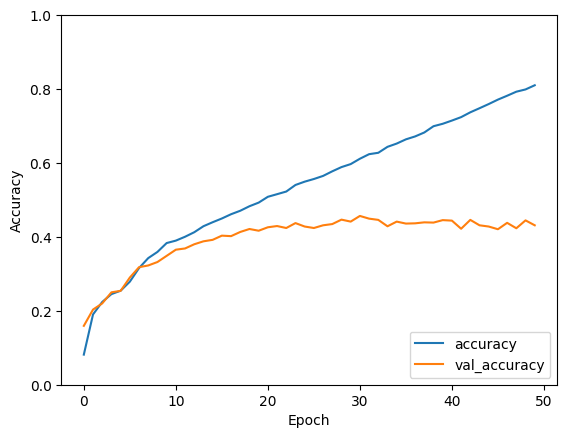

In [ ]:
plt.plot(LeNet_history_2.history['accuracy'], label='accuracy')
plt.plot(LeNet_history_2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

LeNet_test_loss, LeNet_test_acc = LeNet_model_2.evaluate(x_test,  y_test_to20, verbose=2)

AlexNet: Επιλέχθηκε η πρώτη υλοποίηση

63/63 - 7s - loss: 2.4602 - accuracy: 0.5490 - 7s/epoch - 111ms/step


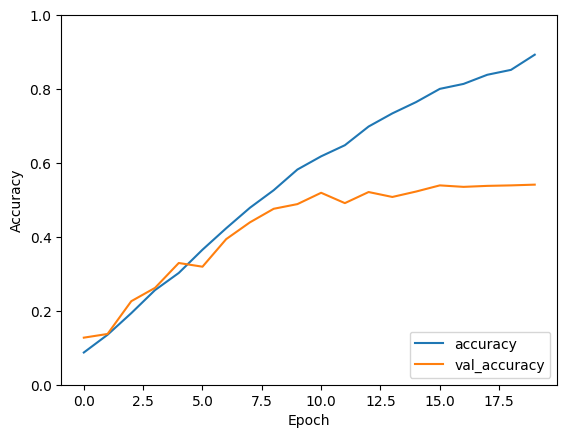

In [ ]:
plt.plot(AlexNet_history_1.history['accuracy'], label='accuracy')
plt.plot(AlexNet_history_1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

AlexNet_test_loss, AlexNet_test_acc = AlexNet_model_1.evaluate(x_test,  y_test_to20, verbose=2)

VGG: Επιλέχθηκε η δεύτερη υλοποίηση

63/63 - 13s - loss: 2.4844 - accuracy: 0.6125 - 13s/epoch - 200ms/step


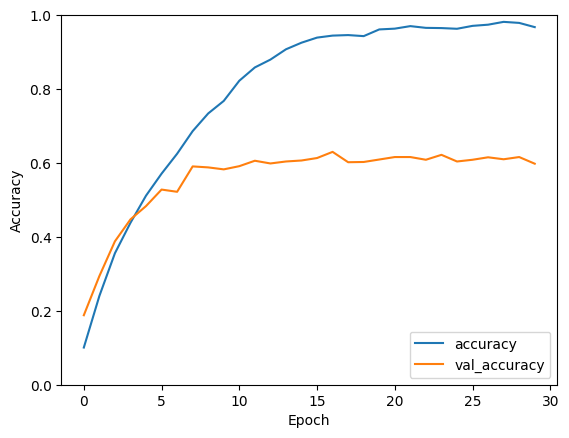

In [ ]:
plt.plot(VGG_history_2.history['accuracy'], label='accuracy')
plt.plot(VGG_history_2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

VGG_test_loss, VGG_test_acc = VGG_model_2.evaluate(x_test,  y_test_to20, verbose=2)

MyCNN: Επιλέχθηκε η δεύτερη υλοποίηση

63/63 - 13s - loss: 1.6753 - accuracy: 0.6630 - 13s/epoch - 209ms/step


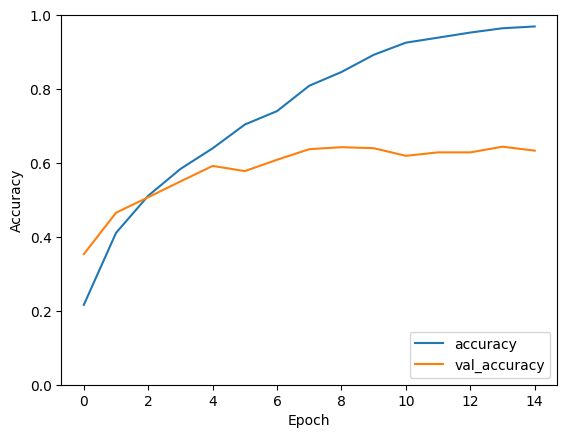

In [ ]:
plt.plot(MyCNN_history_2.history['accuracy'], label='accuracy')
plt.plot(MyCNN_history_2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

MyCNN__test_loss, MyCNN__test_acc = MyCNN_model_2.evaluate(x_test,  y_test_to20, verbose=2)

### Βήμα 3: Συμπεράσματα και αξιολόγηση ορθότητας

Όσον αφορά στο πλήθος των δεδομένων/κλάσεων είνια εύκολο ν καταλάβουμε ότι όσο περισσότερα είναι τα δεδομένα για την εκπάιδευση ενός δικτύου τόσο καλύτερη εκπαίδευση επιτυγχάνεται.

Σχετικά με τον αλγόριθμο βελτιστοποίησης, δεν υπάρχει κανόνας για την επιλογή του. Έτσι, μετά από δοκιμές πάνω στα δίκτυα, φάνηκε ότι κάποιοι αλγόριθμοι αποδίδουν πολύ καλά σε κάποια δίκτυα και καθόλου καλά σε άλλα.

Επίσης, μετά από δοκιμές, φάνηκε ότι η μείωση του μεγέθους δέσμης (batch size) πετυχαίνει καλύτερη επίδοση αλλά αυξάνει σημαντικά τον χρόνο εκπαίδευσης.

Γενικά, η επίδοση του δικτύου LeNet είναι χειρότερη από τα υπόλοιπα. Το MyCNN έχει τις καλύτερες επιδόσεις με λιγότερες εποχές από τα υπόλοιπα, γεγονός που πιθανότατα οφείλεται στα δεδομένα εισόδου και δεν θα είχε αντίστοιχες επιδόσεις για κάθε είδος δεδομένων.

### Ερώτημα 2

### Βήμα 1: Έλεγχος υπερεκπαίδευσης

In [ ]:
# Πρόωρος τερματισμός
def callback_fun(monitor_val, min_delta_val, patience_val):
  return tf.keras.callbacks.EarlyStopping(monitor=monitor_val, min_delta=min_delta_val, patience=patience_val)

In [ ]:
# Dropout
def dropout(dropout_val):
  dropout_layer = models.Sequential()
  dropout_layer.add(layers.Dropout(dropout_val))
  return dropout_layer

In [ ]:
# Επαύξηση δεδομένων
from tensorflow import keras

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(32, 32, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
# Ορισμός νέου μοντέλου με data augmentatios & dropout
def MyCNN_with_data_augmentation_n_dropout(data_aug_flag, dropout_val):
  model = models.Sequential()
  if(data_aug_flag):
    model.add(data_augmentation)      
  model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))  
  model.add(layers.MaxPool2D(pool_size=2, strides=2)) 
  model.add(layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')) 
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Flatten())
  model.add(layers.Dense(2048, activation='relu'))
  model.add(dropout(dropout_val))
  model.add(layers.Dense(20))
  return model

In [ ]:
X = tf.random.uniform((1, 32, 32, 3)) 
for layer in MyCNN_with_data_augmentation_n_dropout(True, 0.5).layers:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

Sequential output shape: 	 (1, 32, 32, 3)
Conv2D output shape: 	 (1, 32, 32, 128)
MaxPooling2D output shape: 	 (1, 16, 16, 128)
Conv2D output shape: 	 (1, 16, 16, 256)
MaxPooling2D output shape: 	 (1, 8, 8, 256)
Conv2D output shape: 	 (1, 8, 8, 512)
MaxPooling2D output shape: 	 (1, 4, 4, 512)
Flatten output shape: 	 (1, 8192)
Dense output shape: 	 (1, 2048)
Sequential output shape: 	 (1, 2048)
Dense output shape: 	 (1, 20)


### Δοκιμές

In [ ]:
# Δοκιμή 1 με data augmentation, dropout = 0.1 και callback ('accuracy', 0.01, 1) 
MyCNN_model_testing_1 = MyCNN_with_data_augmentation_n_dropout(True, 0.1)
callback = callback_fun('accuracy', 0.01, 1)

MyCNN_model_testing_1.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

MyCNN_history_testing_1 = MyCNN_model_testing_1.fit(x_train, y_train_to20, epochs=35, batch_size=128,
                    validation_data=(x_val, y_val_to20), callbacks=[callback])

Epoch 1/35
67/67 [==============================] - 249s 4s/step - loss: 2.6332 - accuracy: 0.1952 - val_loss: 2.2768 - val_accuracy: 0.3067
Epoch 2/35
67/67 [==============================] - 232s 3s/step - loss: 2.0648 - accuracy: 0.3641 - val_loss: 2.0043 - val_accuracy: 0.3887
Epoch 3/35
67/67 [==============================] - 232s 3s/step - loss: 1.7904 - accuracy: 0.4405 - val_loss: 1.7291 - val_accuracy: 0.4840
Epoch 4/35
67/67 [==============================] - 233s 3s/step - loss: 1.6619 - accuracy: 0.4818 - val_loss: 1.7162 - val_accuracy: 0.4927
Epoch 5/35
67/67 [==============================] - 232s 3s/step - loss: 1.4866 - accuracy: 0.5336 - val_loss: 1.5327 - val_accuracy: 0.5407
Epoch 6/35
67/67 [==============================] - 232s 3s/step - loss: 1.3780 - accuracy: 0.5674 - val_loss: 1.4975 - val_accuracy: 0.5520
Epoch 7/35
67/67 [==============================] - 232s 3s/step - loss: 1.3158 - accuracy: 0.5809 - val_loss: 1.4191 - val_accuracy: 0.5680
Epoch 8/35
67

In [ ]:
# Δοκιμή 2 χωρίς data augmentation, dropout = 0.2 και callback ('loss', 0.05, 2)
MyCNN_model_testing_2 = MyCNN_with_data_augmentation_n_dropout(False, 0.2)
callback = callback_fun('loss', 0.05, 2)

MyCNN_model_testing_2.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

MyCNN_history_testing_2 = MyCNN_model_testing_2.fit(x_train, y_train_to20, epochs=35, batch_size=128,
                    validation_data=(x_val, y_val_to20), callbacks=[callback])

Epoch 1/35
67/67 [==============================] - 231s 3s/step - loss: 2.6026 - accuracy: 0.2095 - val_loss: 2.3132 - val_accuracy: 0.2873
Epoch 2/35
67/67 [==============================] - 230s 3s/step - loss: 1.9729 - accuracy: 0.4004 - val_loss: 1.8804 - val_accuracy: 0.4247
Epoch 3/35
67/67 [==============================] - 229s 3s/step - loss: 1.6315 - accuracy: 0.4951 - val_loss: 1.6483 - val_accuracy: 0.4913
Epoch 4/35
67/67 [==============================] - 229s 3s/step - loss: 1.3723 - accuracy: 0.5691 - val_loss: 1.5956 - val_accuracy: 0.5240
Epoch 5/35
67/67 [==============================] - 229s 3s/step - loss: 1.1609 - accuracy: 0.6404 - val_loss: 1.5182 - val_accuracy: 0.5600
Epoch 6/35
67/67 [==============================] - 240s 4s/step - loss: 0.9882 - accuracy: 0.6891 - val_loss: 1.5025 - val_accuracy: 0.5740
Epoch 7/35
67/67 [==============================] - 231s 3s/step - loss: 0.7970 - accuracy: 0.7461 - val_loss: 1.3947 - val_accuracy: 0.5960
Epoch 8/35
67

In [ ]:
# Δοκιμή 3 με data augmentation, dropout = 0.4 και callback ('val_accuracy', 0.05, 2)
MyCNN_model_testing_3 = MyCNN_with_data_augmentation_n_dropout(True, 0.4)
callback = callback_fun('val_accuracy', 0.05, 2)

MyCNN_model_testing_3.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

MyCNN_history_testing_3 = MyCNN_model_testing_3.fit(x_train, y_train_to20, epochs=35, batch_size=128,
                    validation_data=(x_val, y_val_to20), callbacks=[callback])

Epoch 1/35
67/67 [==============================] - 233s 3s/step - loss: 2.5971 - accuracy: 0.2135 - val_loss: 2.2664 - val_accuracy: 0.3147
Epoch 2/35
67/67 [==============================] - 230s 3s/step - loss: 2.0840 - accuracy: 0.3652 - val_loss: 1.8503 - val_accuracy: 0.4353
Epoch 3/35
67/67 [==============================] - 230s 3s/step - loss: 1.8045 - accuracy: 0.4396 - val_loss: 1.8156 - val_accuracy: 0.4260
Epoch 4/35
67/67 [==============================] - 230s 3s/step - loss: 1.6574 - accuracy: 0.4841 - val_loss: 1.7700 - val_accuracy: 0.4760


### Βήμα 2: Αξιολόγηση

63/63 - 17s - loss: 2.0549 - accuracy: 0.6350 - 17s/epoch - 272ms/step


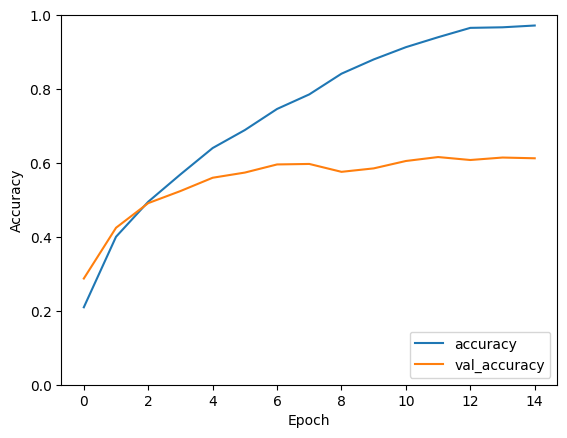

In [ ]:
# Επιλέγεται η δοκιμή 2 χωρίς data augmentation, dropout = 0.2 και callback ('loss', 0.05, 2)
plt.plot(MyCNN_history_testing_2.history['accuracy'], label='accuracy')
plt.plot(MyCNN_history_testing_2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

MyCNN__test_loss_testing, MyCNN__test_acc_testing = MyCNN_model_testing_2.evaluate(x_test,  y_test_to20, verbose=2)

### Ερώτημα 3

### Βήμα 1.1

In [ ]:
# Αρχικοποίηση προεκπαιδευμένου μοντέλου
pretrained_model = tf.keras.applications.VGG19(input_shape=(32,32,3), include_top=False)
pretrained_model.trainable = False

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
# Δημιουργία παραλλαγής μοντέλου MyCNN που χρησιμοποιεί ως βάση το προεκπαιδευμένο μοντέλο
def MyCNN_with_transfer_learning(data_aug_flag, dropout_val):
  model = models.Sequential()
  model.add(pretrained_model)
  model.add(layers.Flatten())
  model.add(layers.Dense(200, activation='relu'))
  model.add(dropout(dropout_val))
  model.add(layers.Dense(20))
  return model

In [ ]:
X = tf.random.uniform((1, 32, 32, 3)) 
for layer in MyCNN_with_transfer_learning(True, 0.5).layers:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

Functional output shape: 	 (1, 1, 1, 512)
Flatten output shape: 	 (1, 512)
Dense output shape: 	 (1, 200)
Sequential output shape: 	 (1, 200)
Dense output shape: 	 (1, 20)


In [ ]:
# Μεταγλώττιση και εκπαίδευση μοντέλου
MyCNN_model_transfer_learning = MyCNN_with_transfer_learning(False, 0.2)
callback = callback_fun('loss', 0.05, 2)

MyCNN_model_transfer_learning.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

MyCNN_history_testing_transfer_learning = MyCNN_model_transfer_learning.fit(x_train, y_train_to20, epochs=10, batch_size=128,
                    validation_data=(x_val, y_val_to20), callbacks=[callback])

Epoch 1/10
67/67 [==============================] - 155s 2s/step - loss: 2.2556 - accuracy: 0.3238 - val_loss: 1.8373 - val_accuracy: 0.4393
Epoch 2/10
67/67 [==============================] - 132s 2s/step - loss: 1.7729 - accuracy: 0.4492 - val_loss: 1.6945 - val_accuracy: 0.4760
Epoch 3/10
67/67 [==============================] - 132s 2s/step - loss: 1.6234 - accuracy: 0.4894 - val_loss: 1.6040 - val_accuracy: 0.4993
Epoch 4/10
67/67 [==============================] - 135s 2s/step - loss: 1.5380 - accuracy: 0.5172 - val_loss: 1.5470 - val_accuracy: 0.5113
Epoch 5/10
67/67 [==============================] - 134s 2s/step - loss: 1.4603 - accuracy: 0.5429 - val_loss: 1.5162 - val_accuracy: 0.5240
Epoch 6/10
67/67 [==============================] - 133s 2s/step - loss: 1.4095 - accuracy: 0.5578 - val_loss: 1.4792 - val_accuracy: 0.5320
Epoch 7/10
67/67 [==============================] - 132s 2s/step - loss: 1.3596 - accuracy: 0.5671 - val_loss: 1.4554 - val_accuracy: 0.5420
Epoch 8/10
67

### Βήμα 1.2

In [ ]:
# Έλεγχος επιπέδων προεκπαιδευμένου δικτύου
pretrained_model_2 = tf.keras.applications.VGG19(input_shape=(32,32,3), include_top=False)

X = tf.random.uniform((1, 32, 32, 3)) 
i = 1
for layer in pretrained_model_2.layers:
    X = layer(X)
    print(i,layer.__class__.__name__, 'output shape: \t', X.shape)
    i+=1

1 InputLayer output shape: 	 (1, 32, 32, 3)
2 Conv2D output shape: 	 (1, 32, 32, 64)
3 Conv2D output shape: 	 (1, 32, 32, 64)
4 MaxPooling2D output shape: 	 (1, 16, 16, 64)
5 Conv2D output shape: 	 (1, 16, 16, 128)
6 Conv2D output shape: 	 (1, 16, 16, 128)
7 MaxPooling2D output shape: 	 (1, 8, 8, 128)
8 Conv2D output shape: 	 (1, 8, 8, 256)
9 Conv2D output shape: 	 (1, 8, 8, 256)
10 Conv2D output shape: 	 (1, 8, 8, 256)
11 Conv2D output shape: 	 (1, 8, 8, 256)
12 MaxPooling2D output shape: 	 (1, 4, 4, 256)
13 Conv2D output shape: 	 (1, 4, 4, 512)
14 Conv2D output shape: 	 (1, 4, 4, 512)
15 Conv2D output shape: 	 (1, 4, 4, 512)
16 Conv2D output shape: 	 (1, 4, 4, 512)
17 MaxPooling2D output shape: 	 (1, 2, 2, 512)
18 Conv2D output shape: 	 (1, 2, 2, 512)
19 Conv2D output shape: 	 (1, 2, 2, 512)
20 Conv2D output shape: 	 (1, 2, 2, 512)
21 Conv2D output shape: 	 (1, 2, 2, 512)
22 MaxPooling2D output shape: 	 (1, 1, 1, 512)


In [ ]:
# Ορισμός σημαιών trainable ως True για τα επίπεδα 1-22
i = 1
for layer in pretrained_model_2.layers:
  if(i<=10):
    layer.trainable = False
  print(i,layer.trainable)
  i += 1

1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 True
20 True
21 True
22 True


In [ ]:
# Δημιουργία παραλλαγής μοντέλου MyCNN που χρησιμοποιεί ως βάση το προεκπαιδευμένο μοντέλο 2
def MyCNN_with_transfer_learning_2(data_aug_flag, dropout_val):
  model = models.Sequential()
  model.add(pretrained_model_2)
  model.add(layers.Flatten())
  model.add(layers.Dense(200, activation='relu'))
  model.add(dropout(dropout_val))
  model.add(layers.Dense(20))
  return model

In [ ]:
X = tf.random.uniform((1, 32, 32, 3)) 
for layer in MyCNN_with_transfer_learning_2(True, 0.5).layers:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

Functional output shape: 	 (1, 1, 1, 512)
Flatten output shape: 	 (1, 512)
Dense output shape: 	 (1, 200)
Sequential output shape: 	 (1, 200)
Dense output shape: 	 (1, 20)


In [ ]:
# Μεταγλώττιση και εκπαίδευση μοντέλου
MyCNN_model_transfer_learning_2 = MyCNN_with_transfer_learning_2(False, 0.2)
callback = callback_fun('loss', 0.05, 2)

MyCNN_model_transfer_learning_2.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

MyCNN_history_testing_transfer_learning_2 = MyCNN_model_transfer_learning_2.fit(x_train, y_train_to20, epochs=10, batch_size=128,
                    validation_data=(x_val, y_val_to20), callbacks=[callback])

Epoch 1/10
67/67 [==============================] - 987s 15s/step - loss: 2.8034 - accuracy: 0.1188 - val_loss: 2.7935 - val_accuracy: 0.0993
Epoch 2/10
67/67 [==============================] - 944s 14s/step - loss: 2.4758 - accuracy: 0.1756 - val_loss: 2.4185 - val_accuracy: 0.1893
Epoch 3/10
67/67 [==============================] - 964s 14s/step - loss: 2.2843 - accuracy: 0.2207 - val_loss: 2.1547 - val_accuracy: 0.2907
Epoch 4/10
67/67 [==============================] - 964s 14s/step - loss: 2.1586 - accuracy: 0.2673 - val_loss: 2.0107 - val_accuracy: 0.3280
Epoch 5/10
67/67 [==============================] - 966s 14s/step - loss: 1.9520 - accuracy: 0.3442 - val_loss: 1.9840 - val_accuracy: 0.3613
Epoch 6/10
67/67 [==============================] - 964s 14s/step - loss: 1.8570 - accuracy: 0.3794 - val_loss: 1.9951 - val_accuracy: 0.3433
Epoch 7/10
67/67 [==============================] - 951s 14s/step - loss: 1.7574 - accuracy: 0.4238 - val_loss: 1.7651 - val_accuracy: 0.4067
Epoch 

### Βήμα 1.3

63/63 - 26s - loss: 1.4035 - accuracy: 0.5710 - 26s/epoch - 415ms/step


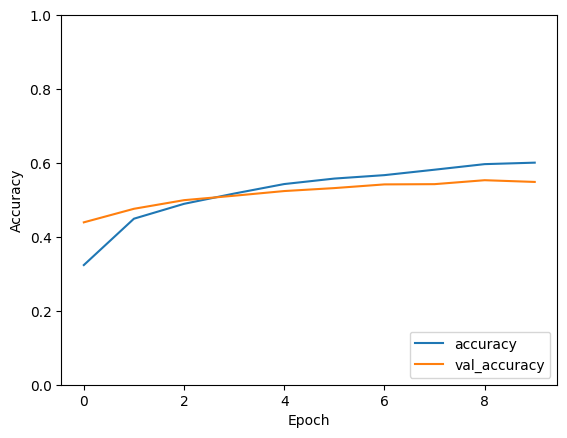

In [ ]:
plt.plot(MyCNN_history_testing_transfer_learning.history['accuracy'], label='accuracy')
plt.plot(MyCNN_history_testing_transfer_learning.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

MyCNN__test_loss_testing_tl, MyCNN__test_acc_testing_tl = MyCNN_model_transfer_learning.evaluate(x_test,  y_test_to20, verbose=2)

63/63 - 26s - loss: 1.7543 - accuracy: 0.4770 - 26s/epoch - 408ms/step


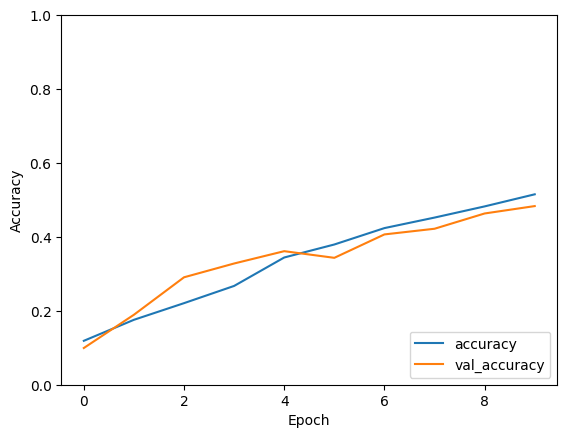

In [ ]:
plt.plot(MyCNN_history_testing_transfer_learning_2.history['accuracy'], label='accuracy')
plt.plot(MyCNN_history_testing_transfer_learning_2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

MyCNN__test_loss_testing_tl_2, MyCNN__test_acc_testing_tl_2 = MyCNN_model_transfer_learning_2.evaluate(x_test,  y_test_to20, verbose=2)

## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά.

Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε σχετικά για το [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data). 

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).
